In [66]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [67]:
# 2. Load Dataset
df = pd.read_csv("C:/Users/rajpu/Downloads/trending_yt_videos_113_countries.csv")

In [68]:
# 3. Basic Info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Shape of dataset: (3059099, 18)

Data Types:
 title              object
channel_name       object
daily_rank          int64
daily_movement      int64
weekly_movement     int64
snapshot_date      object
country            object
view_count          int64
like_count          int64
comment_count       int64
description        object
thumbnail_url      object
video_id           object
channel_id         object
video_tags         object
kind               object
publish_date       object
langauge           object
dtype: object

Missing Values:
 title                    0
channel_name             0
daily_rank               0
daily_movement           0
weekly_movement          0
snapshot_date            0
country                  0
view_count               0
like_count               0
comment_count            0
description         576002
thumbnail_url            0
video_id                 0
channel_id               0
video_tags         1024253
kind                     0
publish_date          

In [69]:
# 4. Feature Engineering
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

df['publish_year'] = df['publish_date'].dt.year
df['publish_month'] = df['publish_date'].dt.month
df['publish_day'] = df['publish_date'].dt.day
df['publish_day_of_week'] = df['publish_date'].dt.day_name()

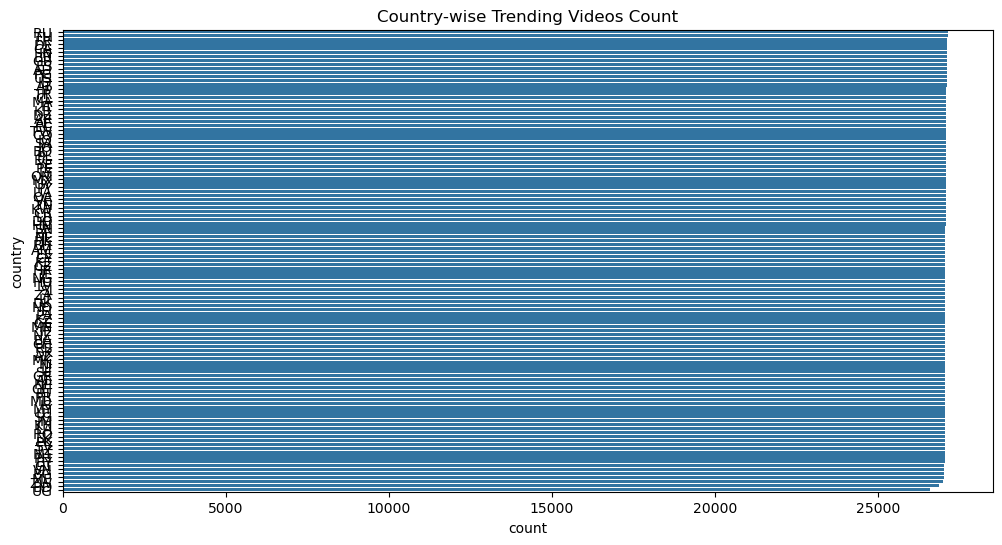

In [70]:
# 5. Univariate Analysis

# Country Distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='country', order=df['country'].value_counts().index)
plt.title('Country-wise Trending Videos Count')
plt.show()

C:\Users\rajpu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.

C:\Users\rajpu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 12387 (\N{HIRAGANA LETTER SMALL TU}) missing from current font.

C:\Users\rajpu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 12379 (\N{HIRAGANA LETTER SE}) missing from current font.



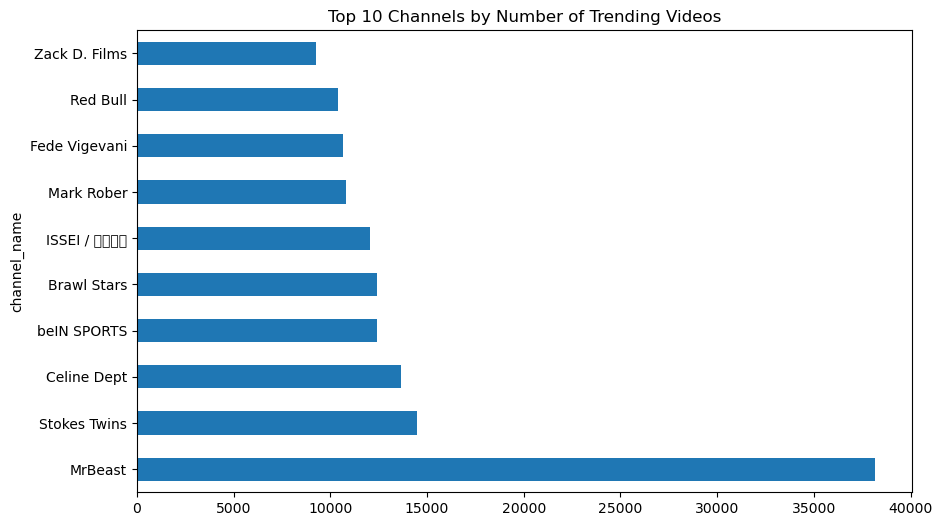

In [71]:
# Top Channels
top_channels = df['channel_name'].value_counts().head(10)
top_channels.plot(kind='barh', figsize=(10,6), title='Top 10 Channels by Number of Trending Videos')
plt.show()

In [72]:
# View, Like, Comment Distribution
numeric_cols = ['view_count', 'like_count', 'comment_count']
df[numeric_cols].describe()

,view_count,like_count,comment_count
count,3.059099e+06,3.059099e+06,3.059099e+06
mean,1.292769e+07,4.135056e+05,7.306013e+03
std,2.713091e+07,9.092280e+05,3.008515e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.989270e+05,1.621300e+04,4.150000e+02
50%,2.082852e+06,7.166500e+04,1.335000e+03
75%,1.196925e+07,3.766385e+05,4.023000e+03
max,1.407108e+09,1.576806e+07,9.543360e+05


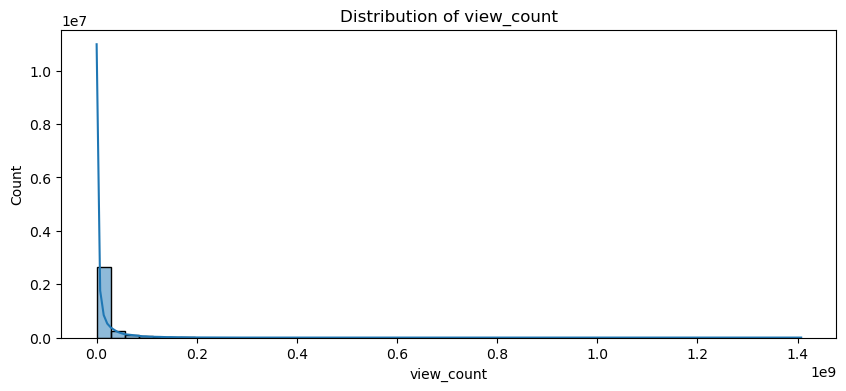

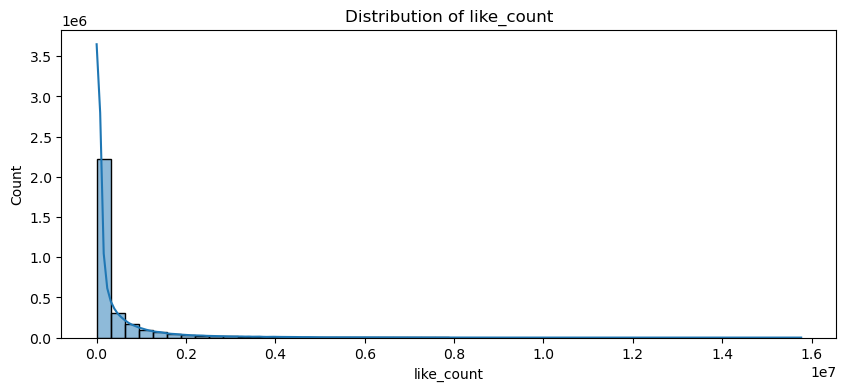

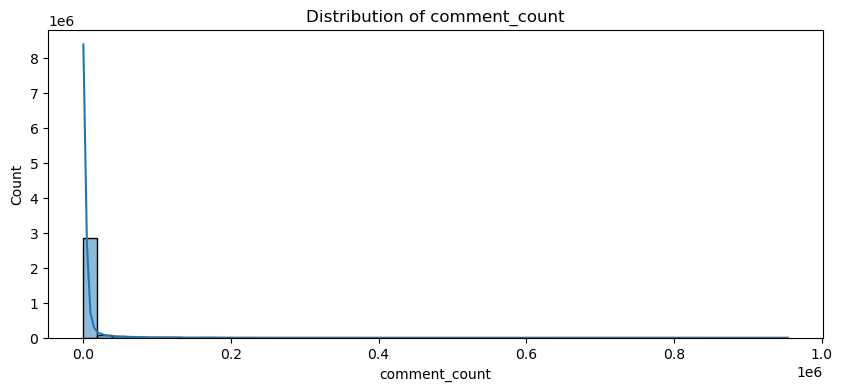

In [73]:
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [74]:
# 6. Bivariate Analysis

# Views vs Likes
fig = px.scatter(df, x='like_count', y='view_count', hover_data=['title'], title='Views vs Likes')
fig.show()

In [75]:
# Views vs Comments
fig = px.scatter(df, x='comment_count', y='view_count', hover_data=['title'], title='Views vs Comments')
fig.show()

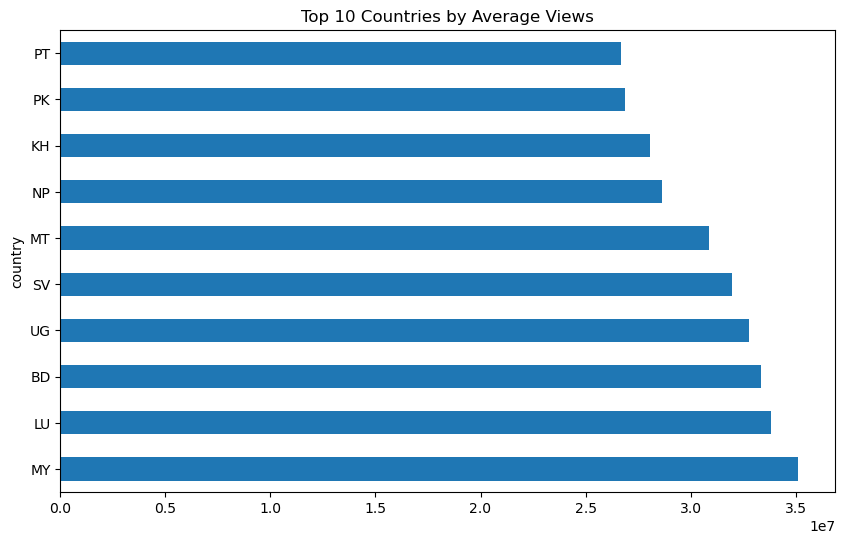

In [76]:
# Country-wise Average Views
country_views = df.groupby('country')['view_count'].mean().sort_values(ascending=False).head(10)
country_views.plot(kind='barh', figsize=(10,6), title='Top 10 Countries by Average Views')
plt.show()

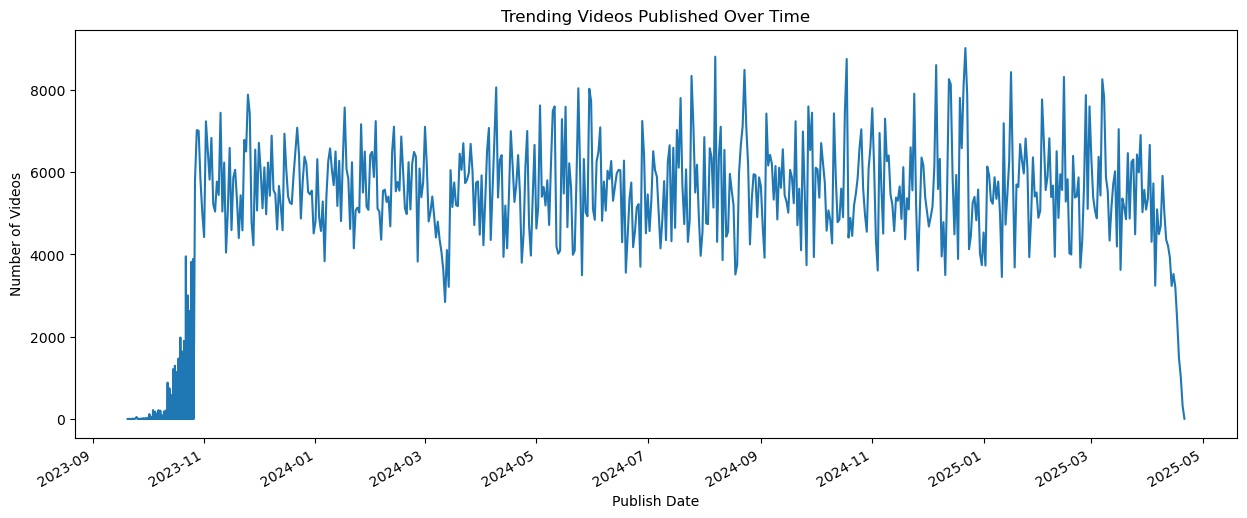

In [77]:
# 7. Trend Analysis

# Number of Videos Published Over Time
df['publish_date'].value_counts().sort_index().plot(kind='line', figsize=(15,6))
plt.title('Trending Videos Published Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Number of Videos')
plt.show()

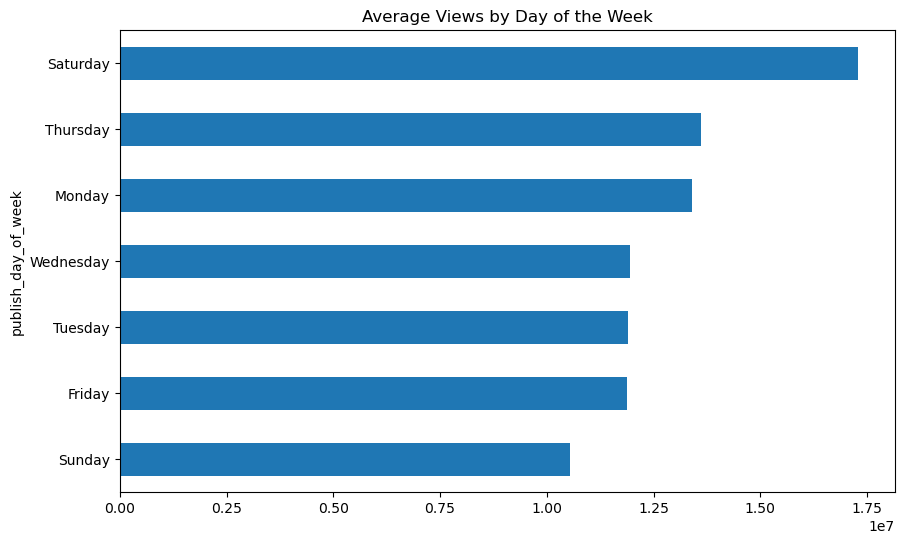

In [78]:
# Views by Publish Day
publish_day_views = df.groupby('publish_day_of_week')['view_count'].mean().sort_values()
publish_day_views.plot(kind='barh', figsize=(10,6), title='Average Views by Day of the Week')
plt.show()

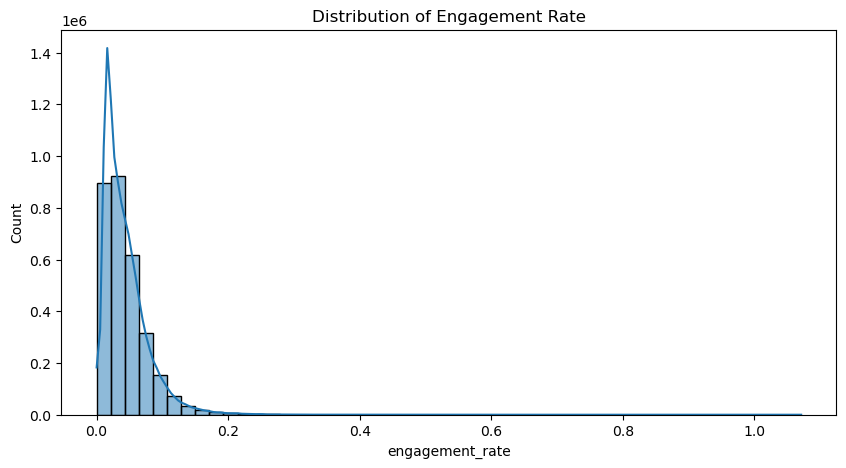

In [79]:
# 8. Engagement Rate

df['engagement_rate'] = (df['like_count'] + df['comment_count']) / df['view_count']

plt.figure(figsize=(10,5))
sns.histplot(df['engagement_rate'], bins=50, kde=True)
plt.title('Distribution of Engagement Rate')
plt.show()

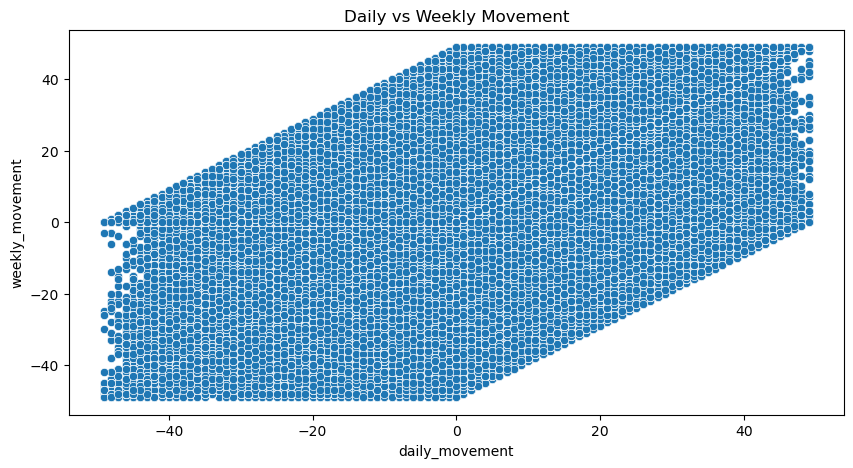

In [80]:
# 9. Daily and Weekly Movement

plt.figure(figsize=(10,5))
sns.scatterplot(x='daily_movement', y='weekly_movement', data=df)
plt.title('Daily vs Weekly Movement')
plt.show()

In [81]:
# 10. Top Insights

# Top 10 Videos by Views
top_videos_views = df[['title', 'view_count']].sort_values(by='view_count', ascending=False).head(10)
print("\nTop 10 Videos by Views:\n", top_videos_views)


Top 10 Videos by Views:
                                 title  view_count
2164479  Discord Loot Boxes are here.  1407108038
2163229  Discord Loot Boxes are here.  1407108038
2167429  Discord Loot Boxes are here.  1407093165
2168329  Discord Loot Boxes are here.  1407093165
2151833  Discord Loot Boxes are here.  1406484672
2151883  Discord Loot Boxes are here.  1406483704
2151930  Discord Loot Boxes are here.  1406482203
2152980  Discord Loot Boxes are here.  1406478891
2153180  Discord Loot Boxes are here.  1406478891
2152882  Discord Loot Boxes are here.  1406478891


In [82]:
# Top 10 Videos by Likes
top_videos_likes = df[['title', 'like_count']].sort_values(by='like_count', ascending=False).head(10)
print("\nTop 10 Videos by Likes:\n", top_videos_likes)



Top 10 Videos by Likes:
                                           title  like_count
3033437                I NEED 1 MORE SUBSCRIBER    15768055
3039059                I NEED 1 MORE SUBSCRIBER    15636836
3044707                I NEED 1 MORE SUBSCRIBER    15519121
3050371                I NEED 1 MORE SUBSCRIBER    15391030
3056017                I NEED 1 MORE SUBSCRIBER    15286424
1445526  How Many Balloons Does It Take To Fly?    11760159
1451170  How Many Balloons Does It Take To Fly?    11698535
1456813  How Many Balloons Does It Take To Fly?    11638489
1462461  How Many Balloons Does It Take To Fly?    11567678
1705708                 Giving 1000 Phones Away    11525850


In [83]:
# Top Channels with most Videos
top_channels_by_count = df['channel_name'].value_counts().head(10)
print("\nTop 10 Channels by Number of Trending Videos:\n", top_channels_by_count)


Top 10 Channels by Number of Trending Videos:
 channel_name
MrBeast          38163
Stokes Twins     14460
Celine Dept      13663
beIN SPORTS      12439
Brawl Stars      12400
ISSEI / いっせい     12064
Mark Rober       10812
Fede Vigevani    10659
Red Bull         10374
Zack D. Films     9260
Name: count, dtype: int64
